In [7]:
import ema as em #2019-17-09
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
# Problem from Example 4.1 on page 72 of course reader.
p1 = em.Domain(2,2)
m1 = p1.material(1.0)
s1 = p1.xsec(1.0, 1.0)

# Create Nodes
n1 = p1.node('1',  0.0, 0.0)
n2 = p1.node('2',  8.0, 0.0)
n3 = p1.node('3', 16.0, 0.0)
n4 = p1.node('4',  8.0, 6.0)

# Create elems
a = p1.truss('a', n1, n2, m1, s1)
b = p1.truss('b', n2, n3, m1, s1)
c = p1.truss('c', n1, n4, m1, s1)
d = p1.truss('d', n2, n4, m1, s1)
e = p1.truss('e', n3, n4, m1, s1)
    
# Create reactions
p1.pin(n1)
p1.fix(n3, 'y')

# number DOFs
p1.numDOF()

# Create loading state
state = em.State(p1)

# Load
state.nLoad(n4, 'x', 10)
state.nLoad(n2, 'y', -5)

P^2_y

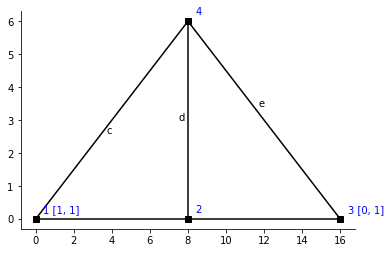

In [3]:
fig, ax = plt.subplots(1,1)
em.plotting.plot_structure(p1, ax)

In [5]:
p1.DOF

[[6, 7], [1, 2], [3, 8], [4, 5]]

In [12]:
B =  sp.Matrix(em.B_matrix(p1))
B

Matrix([
[ 1.0, -1.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0, -1.0,  0.0],
[ 0.0,  1.0,  0.0,  0.0,  0.8],
[ 0.0,  0.0,  0.8,  0.0, -0.8],
[ 0.0,  0.0,  0.6,  1.0,  0.6],
[-1.0,  0.0, -0.8,  0.0,  0.0],
[ 0.0,  0.0, -0.6,  0.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0, -0.6]])

In [10]:
Pf = sp.Matrix(state.Pf)
Pf

Matrix([
[ 0],
[-5],
[ 0],
[10],
[ 0]])

In [17]:
Q = B[:p1.nf,:].inv()@Pf
Q

Matrix([
[ 8.33333333333333],
[ 8.33333333333333],
[ 2.08333333333333],
[              5.0],
[-10.4166666666667]])